# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса ~~Яндекс.Недвижимость~~— архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеки pandas и matplotlib.

In [1]:
import pandas as pd
import matplotlib as plt

Запишем датафрейм в переменную apart (сокр. от apartments). Покажем первые 5 строк таблицы. 

In [2]:
#из-за разделителей в формате csv, данные склеились в одноу строку.
#зададим разделитель параметром sep.
apart = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.options.display.max_columns = None #чтобы отоброжался весь датафрейм
apart.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Название столбцов и описание информации, которую они содержат:	

    • airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
	• balcony — число балконов
	• ceiling_height — высота потолков (м)
	• cityCenters_nearest — расстояние до центра города (м)
	• days_exposition — сколько дней было размещено объявление (от публикации до снятия)
	• first_day_exposition — дата публикации
	• floor — этаж
	• floors_total — всего этажей в доме
	• is_apartment — апартаменты (булев тип)
	• kitchen_area — площадь кухни в квадратных метрах (м²)
	• last_price — цена на момент снятия с публикации
	• living_area — жилая площадь в квадратных метрах(м²)
	• locality_name — название населённого пункта
	• open_plan — свободная планировка (булев тип)
	• parks_around3000 — число парков в радиусе 3 км
	• parks_nearest — расстояние до ближайшего парка (м)
	• ponds_around3000 — число водоёмов в радиусе 3 км
	• ponds_nearest — расстояние до ближайшего водоёма (м)
	• rooms — число комнат
	• studio — квартира-студия (булев тип)
	• total_area — площадь квартиры в квадратных метрах (м²)
	• total_images — число фотографий квартиры в объявлении


In [4]:
apart.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

В данных содержится много пропусков, могут встречаться аномальные значения (напр. на describe видно, что встречаются потолки в 100 метров), 
- Изменения типов данных на целочисленный требут столбцы: 'last_price', 'total_area', 'floors_total', 'balcony', 'airports_nearest', 'parks_around3000', 'ponds_around3000', 'days_exposition'.
- 'first_day_exposition' нужно преобразовать в формат datetime.
- 'is_apartment' записан как object, когда это должен быть булев тип.

### Шаг 2. Предобработка данных

Для удобности чтения столбца 'last_price', приведем его в млн.

In [5]:
apart['last_price'] = apart['last_price'] / 1000000

### Пропущенные значения

Посмотрим, в каких столбцах есть пропущенные значения.

In [7]:
apart.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Пойдем по порядку, разберем каждый столбец с пропусками.

#### 'ceiling_height'

Высота потолков в метрах. Посмотрим, какие уникальные значения встречаются.

In [8]:
apart['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Минимальная высота потолка определяется СНиП как 2.5м., значения ниже приведем к ней.
Все, что выше 5м. - кажется нереальным (заменим на медиану, включая пропуски). 

In [9]:
#напишем функцию, которая будет производить замену значений в строке. 
def replace_large_values(row):
    if row > 5:
        return None
    if row < 2.5:
        return 2.5
    return row 

#применим функцию
apart['ceiling_height'] = apart['ceiling_height'].apply(replace_large_values)
#заменим пропущенные значения на медиану
apart['ceiling_height'] = apart['ceiling_height'].fillna(apart['ceiling_height'].median())

#### 'is_apartment'

Если человек не указал, апартаменты ли это - скорее всего, это не они. Заменим пропущенные значения на False, т.к. это должен быть булев тип, в который мы преобразуем позже.

In [10]:
apart['is_apartment'] = apart['is_apartment'].fillna(False)

#### 'balcony'

Если человек не указал количество балконов - скорее всего, их нет. Заменим пропущенные значения на 0.

In [11]:
apart['balcony'] = apart['balcony'].fillna(0)

#### 'floors_total'

Пропуски в столбце 'floors_total', предположительно возникли из-за того, что во 'floor' уже указали последний этаж. Заполним пропуски в 'floors_total' значениями из соседнего 'floor'

In [12]:
apart['floors_total'] = apart['floors_total'].fillna(apart['floor'])

#### 'kitchen_area' и 'living_area'

Мы можем восстановить здесь какую-то небольшую часть данных, путем вычитания значений в 'living_area' и 'kitchen_area' из 'total_area'.

In [13]:
apart['kitchen_area'] = apart['kitchen_area'].fillna(apart['total_area'] - apart['living_area'])
apart['living_area'] = apart['living_area'].fillna(apart['total_area'] - apart['kitchen_area'])

#### Другие          
- 'cityCenters_nearest '
- 'airports_nearest'
- 'parks_around3000'
- 'parks_nearest'
- 'ponds_around3000'
- 'ponds_nearest'

Мне кажется, что эти столбцы не нуждаются в заполнении пропусков, т.к. мы не можем подставить логически или вычислить пропущенные значения в них. Либо заполнение приведет к искажению реальной картины. 

In [14]:
apart.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1464
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1464
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Замена типов данных

Переведем 'is_apartment' в булев тип, т.к. столбец содержит значения либо True либо False.

In [15]:
apart['is_apartment'] = apart['is_apartment'].astype('bool')

In [16]:
#создадим словарь для столбцов,
#тип данных которых мы хотим изменить на целочисленный
#т.к. так будет проще воспринимать значения.
types_dict = {'floors_total': int,
             'balcony': int,
             'airports_nearest': int,
             'cityCenters_nearest': int,
             'parks_around3000': int,
             'parks_nearest': int,
             'ponds_around3000': int,
             'ponds_nearest': int,
             'days_exposition': int}

#изменим тип данных для словаря
apart = apart.astype(types_dict, errors='ignore')

### Шаг 3. Посчитайте и добавьте в таблицу:

Цена квадратного метра

In [18]:
apart['square_meter_price'] = apart['last_price'] / apart['total_area']

День недели, месяц и год публикации объявления

In [19]:
apart['publication_weekday'] = apart['first_day_exposition'].dt.weekday
apart['publication_month'] = apart['first_day_exposition'].dt.month
apart['publication_year'] = apart['first_day_exposition'].dt.year

Этаж квартиры; варианты - первый, последний, другой

In [20]:
def floor_category(row):
    if row['floor'] == 1:
        return 'Первый'
    if row['floor'] == row['floors_total']:
        return 'Последний'
    return 'Другой'

apart['floor_category'] = apart.apply(floor_category, axis=1)
apart['floor_category'].value_counts()

Другой       17363
Последний     3419
Первый        2917
Name: floor_category, dtype: int64

Cоотношение жилой и общей площади, а также отношение площади кухни к общей

In [21]:
apart['living_to_total_ratio%'] = apart['living_area'] / apart['total_area']
apart['kitchen_to_total_ratio%'] = apart['kitchen_area'] / apart['total_area']

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### Изучим следующие параметры: площадь, цена, число комнат, высота потолков

Посмотрим данные в столбцах и построим их гистограммы:

In [22]:
apart[['total_area', 'last_price', 'rooms', 'ceiling_height']].head()

,total_area,last_price,rooms,ceiling_height
0,108.0,13.000,3,2.70
1,40.4,3.350,1,2.65
2,56.0,5.196,2,2.65
3,159.0,64.900,3,2.65
4,100.0,10.000,2,3.03


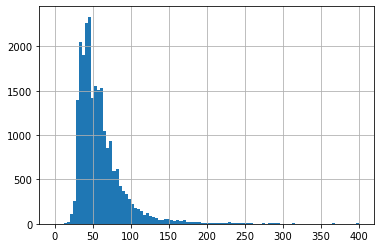

In [23]:
apart['total_area'].hist(bins=100, range=(0, 400));

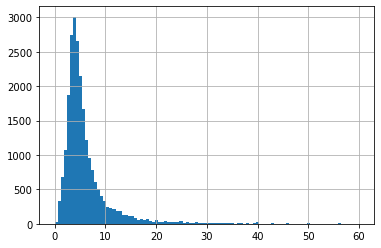

In [24]:
apart['last_price'].hist(bins=100, range=(0, 60));

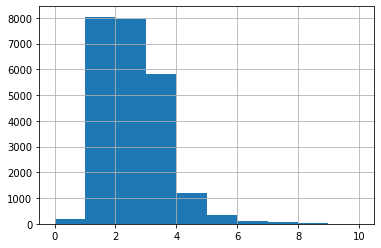

In [25]:
apart['rooms'].hist(bins=10, range=(0, 10));

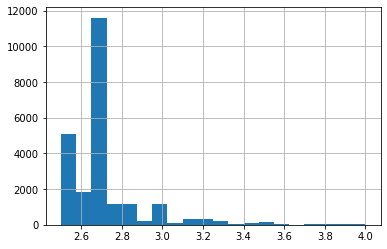

In [26]:
apart['ceiling_height'].hist(bins=20, range=(2.5, 4));

- Чаще всего можно встретить квартиры со общей площадью 42м.кв.
- Больше всего встречается квартир в диапазоне от 30м.кв. до 80м.кв.
- Чаще всего квартиры продают за 5млн. рублей.
- Много квартир состредоточено в ценовом диапазоне от 2млн. до 8млн. рублей
- В большинстве квартир 1 или 2 комнаты, 3 встречаются реже. 
- Высота потолков сосредоточена в отметке 2.6м. 

### Задание 1.

Изучим время продажи квартиры.
- Посчитаем среднее и медиану
- Построим гистограмму
- Узнаем, сколько обычно занимет продажа
- Узнаем, когда можно считать, что продажи прошли очень быстро, а когда необычно долго

In [27]:
apart['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

- Медиана: 95 дней
- Среднее: 180 дней

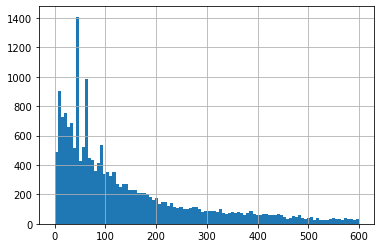

In [28]:
apart['days_exposition'].hist(bins=100, range=(0,600));

- В среднем продажа квартиры занимает от 0 до 95-180 дней, это можно считать быстрой продажей. Значения больше - долгой.

### Задание 2.

- Уберем редкие и выбивающиеся значения.
- Опишем, какие особенности обнаружили.

In [29]:
clean_apart =  apart.query('total_area >= 20 and total_area <= 125 and last_price >= 0.5 and last_price <= 20 and rooms >= 1 and rooms <= 6 and ceiling_height >= 2.5 and ceiling_height <= 3.2 and days_exposition >= 1 and days_exposition <= 500')

### Задание 3. Какие факторы больше всего влияют на стоимость квартиры?

#####  Изучим, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра.

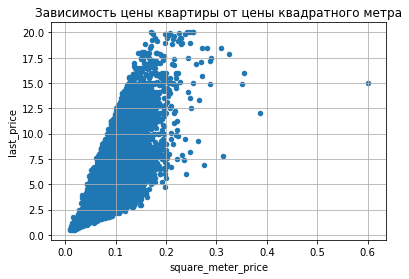

In [30]:
clean_apart.plot(x='square_meter_price', y='last_price', kind='scatter',
                 grid=True,
                 title='Зависимость цены квартиры от цены квадратного метра');

In [31]:
clean_apart['square_meter_price'].corr(clean_apart['last_price'])

0.6754409239808385

- График и корреляция показывает, что цена квартиры зависит от цены квадратного метра выше среднего, то есть чаще всего, с ростом цены за метр растет и цена квартиры.

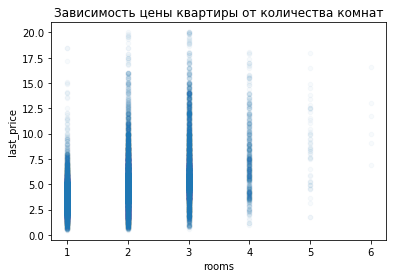

In [32]:
clean_apart.plot(x='rooms', y='last_price', kind='scatter', alpha=0.03,
                title='Зависимость цены квартиры от количества комнат');

In [33]:
clean_apart['rooms'].corr(clean_apart['last_price'])

0.4426991028814099

- График показывает, что 5млн. может стоить как квартира с 1 комнатой, так и с 2мя и 3мя, реже с 4мя. Корреляция говорит, что зависимость цены квартиры от количества комнат есть, однако не сильная.

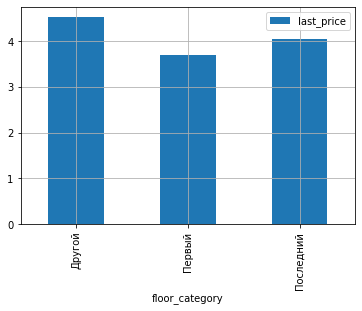

In [34]:
(clean_apart
 .pivot_table(index='floor_category', values='last_price', aggfunc='median')
 .plot(grid=True, kind='bar'));

- График показывает, что квартиры на последних этажах чаще стоят дороже квартир на первом. Однако не выше чем на других этажах.

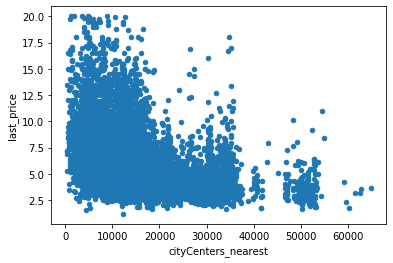

In [35]:
clean_apart.plot(x='cityCenters_nearest', y='last_price', kind='scatter');

In [36]:
clean_apart['cityCenters_nearest'].corr(clean_apart['last_price'])

-0.33769592479111027

- График и слабая отрицательная корреляция показывает, что чаще квартиры ближе к центру стоят дороже других квартир, но не сильно.

##### Также изучим зависимость от даты размещения: дня недели, месяца и года.

In [37]:
clean_apart[['publication_weekday',
             'publication_month',
             'publication_year',
             'last_price']].corr()

,publication_weekday,publication_month,publication_year,last_price
publication_weekday,1.000000,0.010034,-0.000972,-0.007687
publication_month,0.010034,1.000000,-0.222305,0.005923
publication_year,-0.000972,-0.222305,1.000000,-0.001252
last_price,-0.007687,0.005923,-0.001252,1.000000


- Коэффициент корреляции близкий к нулю показывает, что зависимости от даты размещения нет.

##### Выберим 10 населённых пунктов с наибольшим числом объявлений.

А также посчитаем среднюю цену квадратного метра в этих населенных пунктах.

In [38]:
top10_cities = (clean_apart
 .pivot_table(index='locality_name', values='square_meter_price',aggfunc=('count', 'median'))
 .sort_values('count', ascending=False)              
 .head(10))
top10_cities

,count,median
locality_name,,
Санкт-Петербург,11371,0.101974
посёлок Мурино,459,0.084726
посёлок Шушары,379,0.075758
Всеволожск,299,0.065455
Колпино,289,0.073729
посёлок Парголово,282,0.091337
Пушкин,261,0.097500
деревня Кудрово,251,0.091667
Гатчина,240,0.067124


- Населенный пункт с самой высокой стоимостью жилья: Санкт-Петербург
- Населенный пункт с самой низкой стоимостью жилья: Выборг

### Задание 4. Изучите предложения квартир в Санкт-Петербурге

Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра.
- Выделите квартиры в Санкт-Петербурге (*'locality_name'*). 
- Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений.
- После этого посчитайте среднюю цену для каждого километра. 
- Постройте график: он должен показывать, как цена зависит от удалённости от центра.
- Определите границу, где график сильно меняется — это и будет центральная зона.

Выделим квартиры в Санкт-Петербурге:

In [39]:
spb_apart = apart.query('locality_name == "Санкт-Петербург"')

Создадим столбец с расстоянием до центра в километрах, округленных до целых значений:

In [53]:
spb_apart['cityCenters_nearest_km'] = (spb_apart['cityCenters_nearest'] / 1000).round()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Посчитаем медиану цены для каждого километра:

In [41]:
(spb_apart
    .pivot_table(
        index='cityCenters_nearest_km',
        values='last_price',
        aggfunc='median')
    .head(10))

,last_price
cityCenters_nearest_km,
0.0,17.900
1.0,11.395
2.0,10.000
3.0,8.409
4.0,9.200
5.0,9.500
6.0,8.900
7.0,7.800
8.0,7.450


Построим график зависимотсти цены от удалённости от центра:

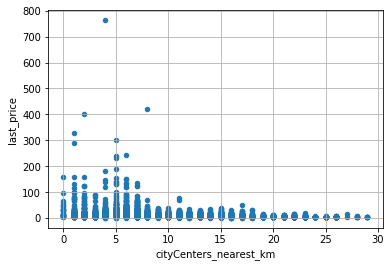

In [42]:
(spb_apart
 .plot(x='cityCenters_nearest_km',
       y='last_price',
       kind='scatter',
       grid=True));

Граница, где график сильно меняется — 8км., это и есть центральная зона.

### Задание 5. Выделите сегмент квартир в центре

- Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.
- Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).
- Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

##### Центр:

In [58]:
spb_centre = spb_apart.query('cityCenters_nearest_km <= 8')

In [44]:
(spb_centre
 .pivot_table(
     index='locality_name',
     values=('total_area', 'living_area', 'kitchen_area',
             'last_price', 'rooms', 'ceiling_height'),
     aggfunc='median')).T

locality_name,Санкт-Петербург
ceiling_height,2.78
kitchen_area,12.00
last_price,8.96
living_area,44.70
rooms,3.00
total_area,76.00


##### Весь город:

In [64]:
(spb_apart
 .pivot_table(
     index='locality_name',
     values=('total_area', 'living_area', 'kitchen_area',
             'last_price', 'rooms', 'ceiling_height'),
     aggfunc='median')).T

locality_name,Санкт-Петербург
ceiling_height,2.65
kitchen_area,10.00
last_price,5.50
living_area,31.50
rooms,2.00
total_area,55.00


### Шаг 5. Общий вывод

- Высота потолков: Потолки в центре обычно выше, чем в остальной части.
- Площадь кухни: Кухня ненамного больше в центре.
- Жилая площадь: В центре обычно на 10м.кв. больше остальной части.
- Общая площадь: Больше в центре, нежели в остальной части.
- Количество комнат: Большинство квартир в центре - 3х комнатные.

Цена квартир в Санкт-Петербурге и соседних населённых пунктов зависит от:
- Количества комнат
- Приближенности к центру
- Общей площади